# Week 10 Assignment

We had two major areas of discussion this week.  The first was all about how to work with string data - parsing and splitting strings using basic string fuctions as well as more complex string matching using regular expressions.  The second was a basic introduction to Pandas with a few different examples of how to load data into Pandas and then visualize it using graphs (histogram, distribution, scatter, bar, timeseries).

* 36.1 - 1 point
* 36.2 - 1 point
* 38.1 - 3 points

## 36.1 String Manipulation

Write a function that will parse an address that includes one or two parts of street information, a city, a state, and a zip code -- all separated by commas.  You can assume that commas won't appear as part of the address information, only as a delimiter.  Here are some examples:

823 Pebble Street, St. Louis, MO 63105

91 Cityplace, Suite #33, St. Louis, MO 63144

81234 Homeroad, Kansas City, MO 62441


The output you should generate will be a dictionary with the following possible items.

```
{
  'street1': '91 Cityplace',
  'street2': 'Suite #33',
  'city': 'St. Louis',
  'state': 'MO',
  'zip': '63122'
}
```

Declare your function like this:
```
parse_address(address)
```

In [6]:
### YOUR SOLUTION
def parse_address(addr):
    data = addr.split(",")
    # split the last element by space to retrieve state and zip code
    state, zip_code = data[-1].strip().split(" ")

    if len(data) == 3:
        # data contains only one street name
        return {
            'street1': data[0].strip(), 'city': data[1].strip(),
            'state': state, 'zip': zip_code
        }
    elif len(data) == 4:
        # data contains two street names
        return {
            'street1': data[0].strip(), 'street2': data[1].strip(), 'city': data[2].strip(),
            'state': state, 'zip': zip_code
        }

## 36.2 Test the Address Parser

Now write a series of good tests to ensure that your addres parser is going to work with a variety of different inputs.  Include at least 5 different examples.

In [7]:
assert parse_address("823 Pebble Street, St. Louis, MO 63105") == {
    'street1': '823 Pebble Street',
    'city': 'St. Louis',
    'state': 'MO',
    'zip': '63105'
}
assert parse_address("91 Cityplace, Suite #33, St. Louis, MO 63144") == {
    'street1': '91 Cityplace',
    'street2': 'Suite #33',
    'city': 'St. Louis',
    'state': 'MO',
    'zip': '63144'
}
assert parse_address("81234 Homeroad, Kansas City, MO 62441") == {
    'street1': '81234 Homeroad',
    'city': 'Kansas City',
    'state': 'MO',
    'zip': '62441'
} 
assert parse_address("1 N Grand Blvd, St. Louis, MO 63103") == {
    'street1': '1 N Grand Blvd',
    'city': 'St. Louis',
    'state': 'MO',
    'zip': '63103'
} 
assert parse_address("1900 Maplewood Commons Dr, Maplewood, MO 63143") == {
    'street1': '1900 Maplewood Commons Dr',
    'city': 'Maplewood',
    'state': 'MO',
    'zip': '63143'
} 
assert parse_address("3829 N Belt Line Rd, Apt #2415, Irving, TX 75038") == {
    'street1': '3829 N Belt Line Rd',
    'street2': 'Apt #2415',
    'city': 'Irving',
    'state': 'TX',
    'zip': '75038'
} 

In [8]:
parse_address("823 Pebble Street, St. Louis, MO 63105")

{'street1': '823 Pebble Street',
 'city': 'St. Louis',
 'state': 'MO',
 'zip': '63105'}

In [9]:
parse_address("91 Cityplace, Suite #33, St. Louis, MO 63144")

{'street1': '91 Cityplace',
 'street2': 'Suite #33',
 'city': 'St. Louis',
 'state': 'MO',
 'zip': '63144'}

In [10]:
parse_address("81234 Homeroad, Kansas City, MO 62441")

{'street1': '81234 Homeroad',
 'city': 'Kansas City',
 'state': 'MO',
 'zip': '62441'}

In [11]:
parse_address("1 N Grand Blvd, St. Louis, MO 63103")

{'street1': '1 N Grand Blvd',
 'city': 'St. Louis',
 'state': 'MO',
 'zip': '63103'}

In [12]:
parse_address("1900 Maplewood Commons Dr, Maplewood, MO 63143")

{'street1': '1900 Maplewood Commons Dr',
 'city': 'Maplewood',
 'state': 'MO',
 'zip': '63143'}

In [13]:
parse_address("3829 N Belt Line Rd, Apt #2415, Irving, TX 75038")

{'street1': '3829 N Belt Line Rd',
 'street2': 'Apt #2415',
 'city': 'Irving',
 'state': 'TX',
 'zip': '75038'}

## 38.1 COVID-19 Trend Data

Since we're dealing with a global pandemic right now, probably good to go ahead and do some anlysis with that data.  Take a look at what's here: https://ourworldindata.org/covid-sources-comparison

Near the middle of the page, there are two charts with some data.  On the left is "positive cases" and on the right is "deaths."  Both charts have a button that says "Data."  What you will do below is write a series of Python commands (doesn't need to be in a function) to read that data and produce a simple timeseries chart using the information from John's Hopkins.  Your code will need to read the data, possibly do some reformatting, and then produce a simple timeseries chart.

(Unfortunately, the tools used on this website don't make it easy to link to and directly download the data, so I've placed a copy in `/data/covid19.xlsx` for you to access.  This file came from one of the underlying sources: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

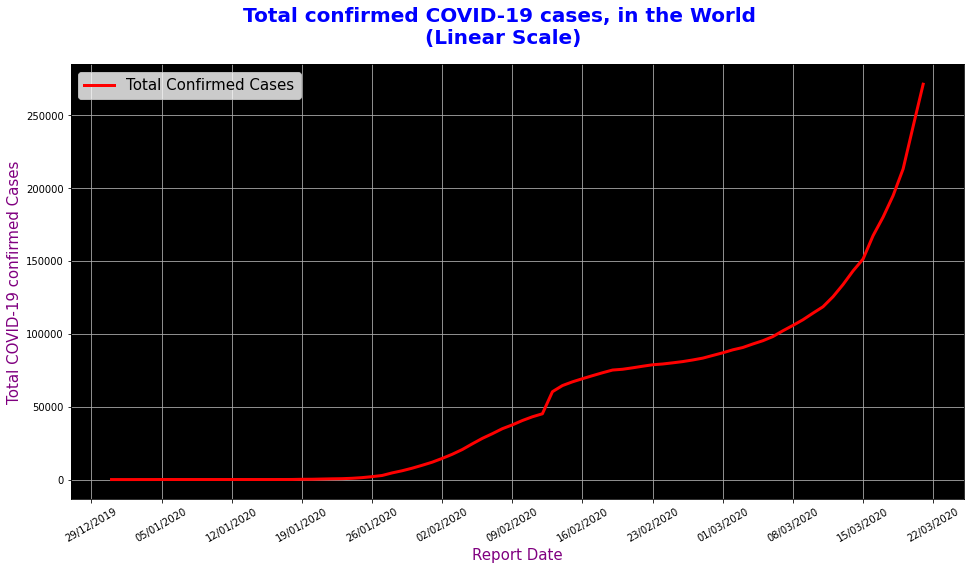

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

data = pd.read_excel("/data/covid19.xlsx", quotechar = '"')

# group data by Date, which makes the Date column unique, by
# sum-ing up rest of the columns
data = data.groupby('DateRep')['Cases'].sum().reset_index()

# set date format so that we can sort the data according to dates
# %d - captures day of month, example, 12
# %m - captures month of year expressed in number, example, 11
# %Y - captures year number in with century, example, 2020
# Therefore, %d/%m/%Y captures date in this format -
# 12/11/2020
data['DateRep'] = pd.to_datetime(data['DateRep'], format="%d/%m/%Y")

# sort the data by date in ascending order
data = data.sort_values(by=['DateRep'])

# calculate cumulative sum of 'Johns Hopkins' column
data['Cases'] = data['Cases'].cumsum()

ax = plt.gca()

# set date format so that we can sort the data according to dates
# %d - captures day of month, example, 12
# %m - captures month of year expressed in number, example, 11
# %Y - captures year number in with century, example, 2020
# Therefore, %d/%m/%Y captures date in this format -
# 12/11/2020
formatter = mdates.DateFormatter("%d/%m/%Y")
ax.xaxis.set_major_formatter(formatter)

# set time interval to show on x axis, decreased because of clutter
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# plot the data
ax.set_facecolor('xkcd:black')
plt.xlabel('Report Date', fontsize = 15, color = 'purple')
plt.ylabel('Total COVID-19 confirmed Cases', fontsize = 15, color = 'purple')
plt.suptitle('Total confirmed COVID-19 cases, in the World' + ' \n(Linear Scale)', fontsize = 20, fontweight= 'bold', color= 'blue')
plt.plot(data['DateRep'], data['Cases'], color = 'red', Linewidth = 3, label = 'Total Confirmed Cases')
plt.grid()
plt.legend(loc = 'upper left', fontsize = 15)

#rotate the labels on x axis
plt.xticks(rotation=30)

plt.show(block=False)


One hint that you might find helpful while working on this is that the data in this file is the number of cases each week, not the running total.  You will want to plot a running total.

To do so, pandas has a `.cumsum()` method that you can use after doing a `groupby` and a `.sum()` somewhat similar to the last example of the pandas-viz.ipynb file (except in that example, it's doing a `mean()` instead of `sum()` and a `rolling()` instead of `cumsum()`.)  This link might also provide a little guidance: https://stackoverflow.com/questions/48739374/pandas-plot-cumulative-sum-of-counters-over-time

## Extra Challenges

Take the same data, but not start looking at it by country.  Do some groupbys.

Or take the same data and look at the mortality rate (deaths / total reported cases) and see how that is different by country or trending over time.

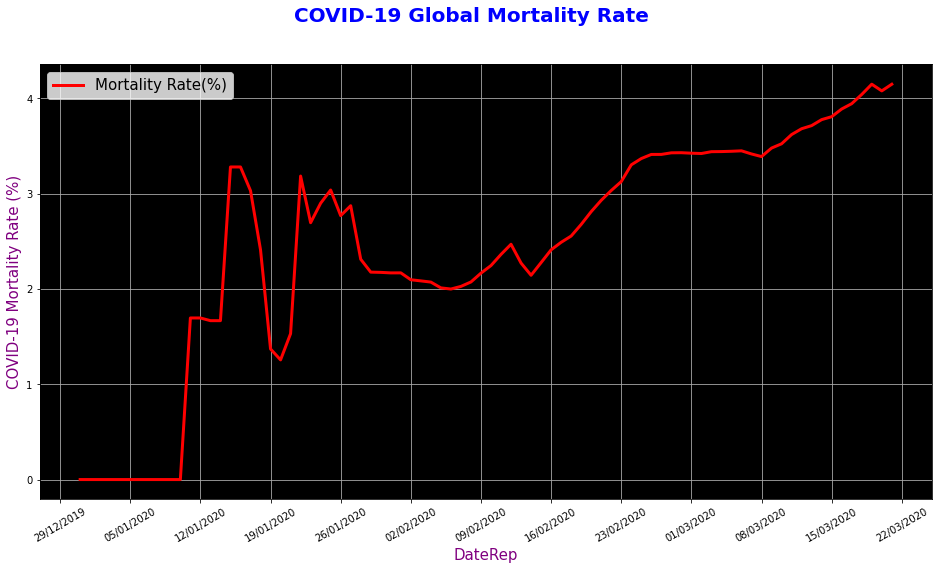

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8


data = pd.read_excel("/data/covid19.xlsx", quotechar = '"')

# group data by Date, which makes the Date column unique, by
# sum-ing up rest of the columns
data = data.groupby('DateRep').sum().reset_index()

# set date format so that we can sort the data according to dates
# %d - captures day of month, example, 12
# %m - captures month of year expressed in number, example, 11
# %Y - captures year number in with century, example, 2020
# Therefore, %d/%m/%Y captures date in this format -
# 12/11/2020
data['DateRep'] = pd.to_datetime(data['DateRep'], format="%d/%m/%Y")

# sort the data by date in ascending order
data = data.sort_values(by=['DateRep'])

# calculate cumulative sum of 'Deaths' and 'Cases' columns
data['Deaths'] = data['Deaths'].cumsum()
data['Cases'] = data['Cases'].cumsum()

# get the mortality rate in %
# mortality_rate = (Deaths / Cases) * 100
mortality_rate = (data['Deaths'] / data['Cases']) * 100

ax = plt.gca()

# set date format so that we can sort the data according to dates
# %d - captures day of month, example, 12
# %m - captures month of year expressed in number, example, 11
# %Y - captures year number in with century, example, 2020
# Therefore, %d/%m/%Y captures date in this format -
# 12/11/2020
formatter = mdates.DateFormatter("%d/%m/%Y")
ax.xaxis.set_major_formatter(formatter)

# set time interval to show on x axis, decreased because of clutter
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

# plot the data
ax.set_facecolor('xkcd:black')
plt.xlabel('DateRep', fontsize = 15, color = 'purple')
plt.ylabel('COVID-19 Mortality Rate (%)', fontsize = 15, color = 'purple')
plt.suptitle('COVID-19 Global Mortality Rate', fontsize = 20, fontweight= 'bold', color= 'blue')
plt.plot(data['DateRep'], mortality_rate, color = 'red', Linewidth = 3, label = 'Mortality Rate(%)')
plt.grid()
plt.legend(loc = 'upper left', fontsize = 15)

#rotate the labels on x axis
plt.xticks(rotation=30)

plt.show(block=False)


In [17]:
data = pd.read_excel("/data/covid19.xlsx", quotechar = '"')
#combine all the data to calculate the total cases and total deaths
#calculate the mortality rate 
data = data.groupby("Countries and territories").agg(
    {"Cases": "sum", "Deaths": "sum"})

#filter the confirmed cases by at least 1000. 
#because many countries have few confirmed case
#Therefor, mortality rate for those couldn't be representative
data = data[data.Cases > 1000]
data["DeathsRate"] = 100 * data.Deaths/data.Cases

#printing mortality rate in ascending order
mortality_rate = data.DeathsRate.sort_values(ascending=False)
print(mortality_rate)

#printing the median of mortality rate
print(f"Median mortality rate: {mortality_rate.median()}")

Countries and territories
Italy                       8.574892
Iran                        7.294848
Spain                       5.015015
United_Kingdom              4.443887
China                       4.005355
France                      3.568030
Netherlands                 3.540414
Japan                       3.475670
Belgium                     1.639344
United_States_of_America    1.324908
South_Korea                 1.170588
Sweden                      0.985829
Switzerland                 0.888430
Denmark                     0.717131
Portugal                    0.588235
Norway                      0.401837
Germany                     0.245593
Austria                     0.226501
Malaysia                    0.194175
Name: DeathsRate, dtype: float64
Median mortality rate: 1.3249082755809214
